# **Milestone** | NYC Public High School Data Analysis

<div style="text-align: center;">
<img src="https://upload.wikimedia.org/wikipedia/commons/b/b1/NYC_DOE_Logo.png" alt="NYC DOE Logo" width="300"/>
</div>


# Introduction
For this Milestone, you’re joining the New York City Department of Education as a data analyst intern. Your first assignment is to explore a dataset containing recent information on NYC public high schools, including enrollment numbers, demographics, and socioeconomic indicators.

Your goal is to better understand the landscape of public high school education in NYC by analyzing key metrics such as total enrollment, percentage of students with disabilities, English learners, and students living in poverty. By visualizing these variables and investigating potential relationships between them, you’ll help uncover patterns and raise important questions that could inform future policy decisions.

Your work here lays the foundation for data-driven improvements in educational equity, resource allocation, and student support across the city’s schools.


To start, import both the pandas library and the plotly.express library.

In [5]:
# Import libraries here
import pandas as pd
import plotly.express as px
import os
print(os.getcwd())

/home/jovyan/python/SkillBuilder-06/Milestone


# Task 1: Explore the dataset

You will use the `schools.csv` dataset to complete your analysis. Each row gives data for a particular school in New York City.


The `schools` dataset contains the following information:
- **school_name**: Name of the school
- **total_enrollment**: Number of students enrolled
- **percent_students_with_disabilities**: Percentage of students with disabilities
- **percent_english_learners**: Percentage of students who speak English as a second language (ESL)
- **percent_poverty**: Percentage of students who are below the poverty line


Load the dataset into a DataFrame and randomly preview 10 rows.

In [6]:
# Load the data

schools_df = pd.read_csv("schools.csv")
# Preview 10 randomly chosen rows
print(schools_df.sample(10))



                                         school_name  total_enrollment  \
1575                    School for Human Rights, The             409.0   
772                              Newtown High School            1953.8   
206   Charter High School for Law and Social Justice             242.0   
80       Boys Preparatory Charter School of New York             236.0   
1011                          P.S. 095 The Gravesend             948.0   
144                       Brooklyn Brownstone School             237.4   
53                          Astor Collegiate Academy             478.2   
217                       Claremont International HS             307.6   
798                                P.S. 005 Huguenot             259.6   
942                             P.S. 058 The Carroll             980.0   

      percent_students_with_disabilities  percent_english_learners  \
1575                           18.800000                      5.10   
772                            12.160000     

In [7]:
# List the columns of the DataFrame
print("Columns:", schools_df.columns.tolist())

Columns: ['school_name', 'total_enrollment', 'percent_students_with_disabilities', 'percent_english_learners', 'percent_poverty']


In [8]:
# How many schools are in New York City?
print("Rows and Columns:", schools_df.shape)
#There are 1,834 different public high schools in New York City.


# In other words, what is the size ("shape") of the dataframe?
#So, the dataset contains information on 1,834 NYC public high schools, with 5 attributes per school.

Rows and Columns: (1834, 5)


In [17]:
# What kinds of data are in each column? Are there any missing values?
#All columns have 1834 non-null entries.


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1834 entries, 0 to 1833
Data columns (total 5 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   school_name                         1834 non-null   object 
 1   total_enrollment                    1834 non-null   float64
 2   percent_students_with_disabilities  1834 non-null   float64
 3   percent_english_learners            1834 non-null   float64
 4   percent_poverty                     1834 non-null   float64
dtypes: float64(4), object(1)
memory usage: 71.8+ KB


In [18]:
# View the statistical summary of the DataFrame
schools_df.describe()

,total_enrollment,percent_students_with_disabilities,percent_english_learners,percent_poverty
count,1834.000000,1834.000000,1834.000000,1834.000000
mean,588.309481,21.944242,13.284084,75.030873
std,481.135549,15.793045,13.986404,19.179663
min,12.000000,0.000000,0.000000,3.950000
25%,313.250000,14.963750,4.120000,68.065000
50%,476.700000,19.340000,9.070000,79.680000
75%,694.950000,24.415000,17.785000,88.580000
max,5591.800000,100.000000,99.600000,99.380000


When looking at statistical summaries of the data, pay attention to the mean and the median (50th percentile) of each column. If the two values are very different, this may be something to look into.

Do the mean and the median vary significantly in any of the columns?

<div style="border: 3px solid #30EE99; background-color: #f0fff4; padding: 15px; border-radius: 8px; color: #222; display: flex; align-items: center;">
  <span style="font-size: 10pt;">
    <strong>Try This AI Prompt:</strong> The mean percent_poverty for a high school in NYC is 75%, the median is almost 80%, and the standard deviation is 19%.How do I interpret the distribution of poverty levels across schools? Is the difference between the mean and median significant? Does it fall within an expected range given the high standard deviation?
  </span>
</div>

To interpret the distribution of poverty levels across NYC high schools, we start by comparing the mean (75%) and median (approximately 80%) along with the standard deviation (19%).

The median being higher than the mean indicates a left-skewed distribution, meaning that while most schools have very high poverty levels, a smaller number of schools with lower poverty rates are pulling the mean downward. This skewness suggests that high poverty is the norm in NYC public high schools, but a few relatively affluent schools exist within the system.

The difference of 5 percentage points between the mean and median is noticeable, but not extreme—especially considering the standard deviation is relatively large (19%). A high standard deviation means there's a wide range of poverty levels across schools, so variation of this size between the mean and median is within an expected range. It reflects real disparities across schools and neighborhoods, rather than statistical noise.

In summary, while the difference between the mean and median is meaningful, it is not unusually large given the high variability in the data. It signals that most schools serve predominantly low-income populations, but there is enough variation in the dataset to reflect a small number of outlier schools with significantly lower poverty levels

#Task 2: Explore the dataset ... visually

Visualization is one of the most powerful ways to understand your data at a glance. It allows you to quickly spot trends, distributions, and outliers that might be hidden in raw numbers. In this task, you'll use histograms to better understand the characteristics of NYC public high schools.

<div style="border: 3px solid #f8c43e; background-color: #fff3c1; padding: 15px; border-radius: 8px; color: #222; display: flex; align-items: center;">
  <span style="font-size: 10pt;">
      <span style="font-family: monospace; color: #222;">px.histogram</span> is the workhorse of the <span style="font-family: monospace; color: #222;">plotly</span> library. It will be the most used function in our tool box, especially as you're familiarizing yourself with a dataset!
  </span>
</div>

### Task 2a: Total Enrollment
**1.** Create a histogram to explore how student enrollment is distributed across schools. You'll need to answer the questions that follow.

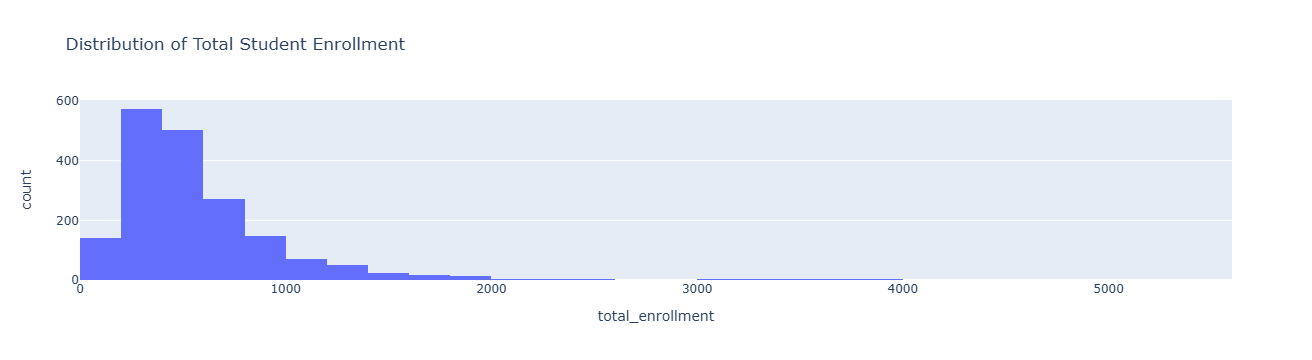

In [10]:
# Plot the distribution of total student enrollment
px.histogram(schools_df, x="total_enrollment", nbins=30, title="Distribution of Total Student Enrollment")

**2.** What is the most typical school size in terms of student enrollment?

From the histogram, most NYC high schools appear to fall in the 200 to 600 student range. The highest bar (mode) is between 0 and 600, with a sharp drop-off afterward. This suggests that small to mid-sized schools are the most common.


**3.** Are there any outliers? Remember that outliers are values that are "far away" from a tyical value!

Yes, there are clear outliers. Most schools cluster on the left (under ~1000 students), but a few schools have extremely high enrollment, even up to 5,000+ students, which is far outside the typical range. These are outliers because they lie far beyond the bulk of the distribution.



**4.** Could outliers (if any) indicate the existence of specialized schools for students with disabilities? Don't be afraid to use ChatGPT to help you in your response!

Schools with extremely high enrollment might include specialized or magnet schools that draw students citywide, large comprehensive high schools, and schools sharing campuses, where enrollment data may be aggregated.Alternatively, these outliers may also reflect administrative reporting differences or combined school records. It's worth investigating these schools individually to understand why they serve so many students compared to the typical NYC high school.



### Task 2b: Students with Disabilities
**1.** Create a histogram to view the distribution of the percentage of students with disabilities across the schools. You'll need to answer the questions that follow.

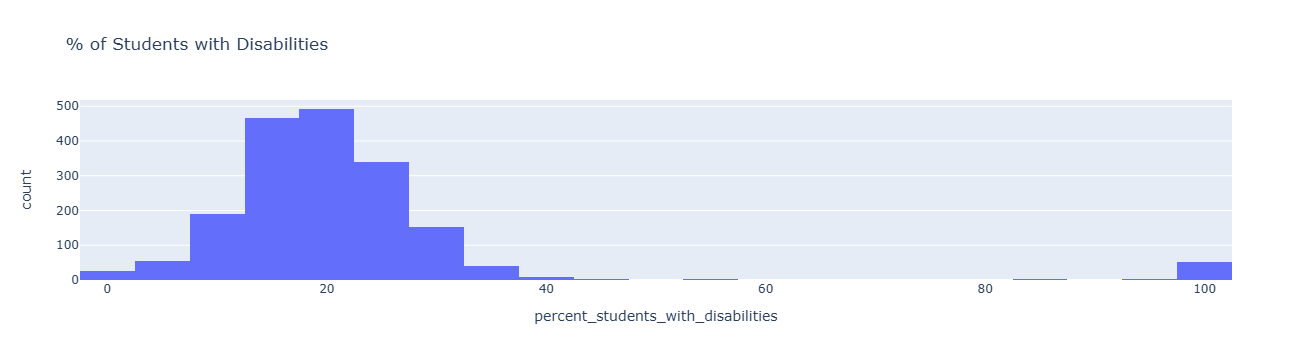

In [11]:
# Plot the distribution of the % of students with disabilities in schools
px.histogram(schools_df, x="percent_students_with_disabilities", nbins=30, title="% of Students with Disabilities")

**2.** Are most schools clustered around a certain percentage?

Most schools fall between 10% and 25%, with a peak near 20%.


**3.** Are there any outliers in your data? What might those outliers mean?

<div style="border: 3px solid #30EE99; background-color: #f0fff4; padding: 15px; border-radius: 8px; color: #222; display: flex; align-items: center;">
  <span style="font-size: 10pt;">
    <strong>Try This AI Prompt:</strong> How should I interpret a school with 100% students with disabilities?
  </span>
</div>

Yes, some schools have 60–100% of students with disabilities. If a school has 100%, it's likely a specialized school exclusively for students with disabilities.

#### Task 2c: English Learners
**1.** Create a histogram to view the distribution of the percentage of students who are learning English as a second language in NYC’s public high schools. You'll need to answer the questions that follow.

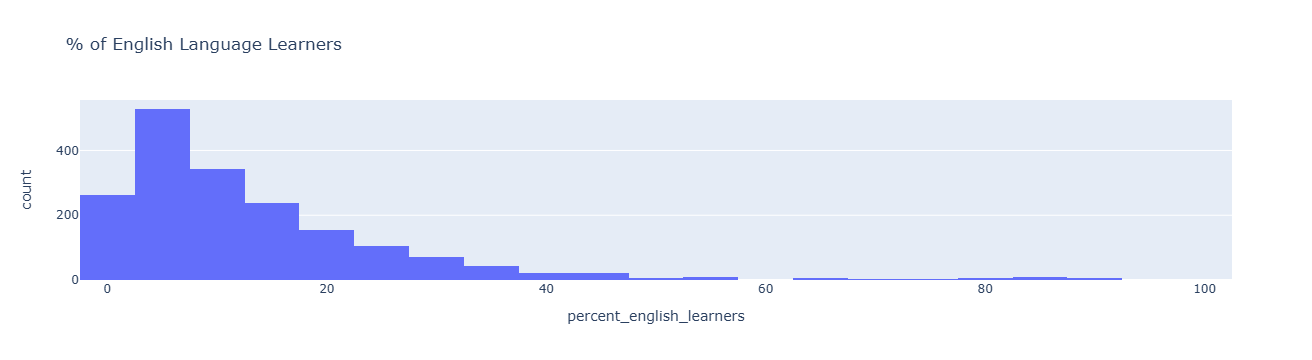

In [12]:
# Plot the distribution of the % of students who are learning English as a second language in schools
px.histogram(schools_df, x="percent_english_learners", nbins=30, title="% of English Language Learners")

**2.** Are there many schools with high percentages of English learners?
Most schools are clustered between 0–20%, but there are some with 50%+, which is unusually high.

Double-click (or enter) to edit



**3.** Are there outliers? What could these outliers indicate about particular schools?
Schools with a high percentage of English learners may be dual-language programs, newcomer academies, or serve predominantly immigrant communities.

Double-click (or enter) to edit



#### Task 2d: Students in Poverty
**1.** Create a histogram to view the distribution of the percentage of students whose families fall below the poverty line in NYC public high schools.

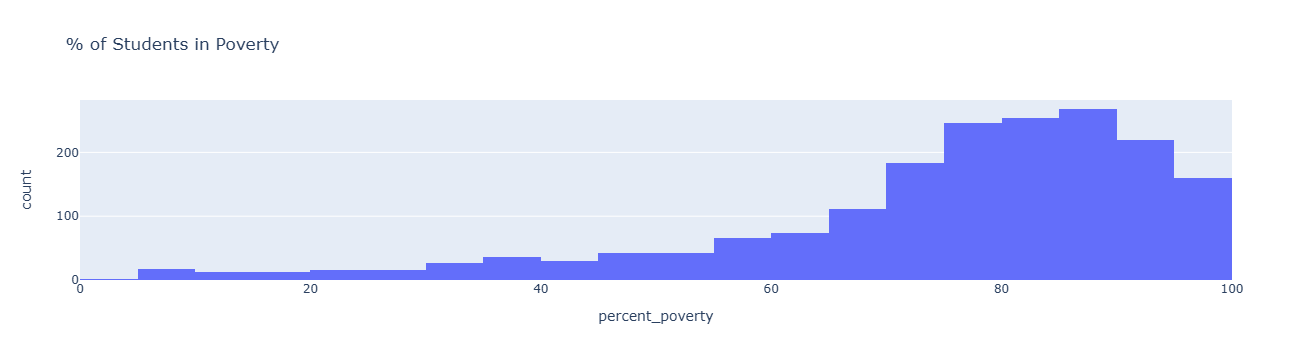

In [13]:
# Plot the distribution of the % of students whose families are below the poverty line in schools
px.histogram(schools_df, x="percent_poverty", nbins=30, title="% of Students in Poverty")

**2.** Based on these four histograms, what are the typical characteristics of an average NYC public high school in terms of enrollment, student disabilities, English learners, and the percentage of students living below the poverty line?









A typical NYC public high school has 500–1000 students, 20% of students with disabilities, 10–15% English learners, and 75–80% of students living in poverty.



#### Task 2e: A Relationship Between Poverty and English Language Learners

By plotting these two variables, we aim to see if there is a *correlation* between high poverty rates and a higher proportion of students learning English as a second language. This can help identify trends, such as whether schools in more impoverished areas tend to serve a higher percentage of students who are learning English as a second language.

**1.** Create a scatter plot with the poverty rate on the x-axis and the percentage of English learners on the y-axis.



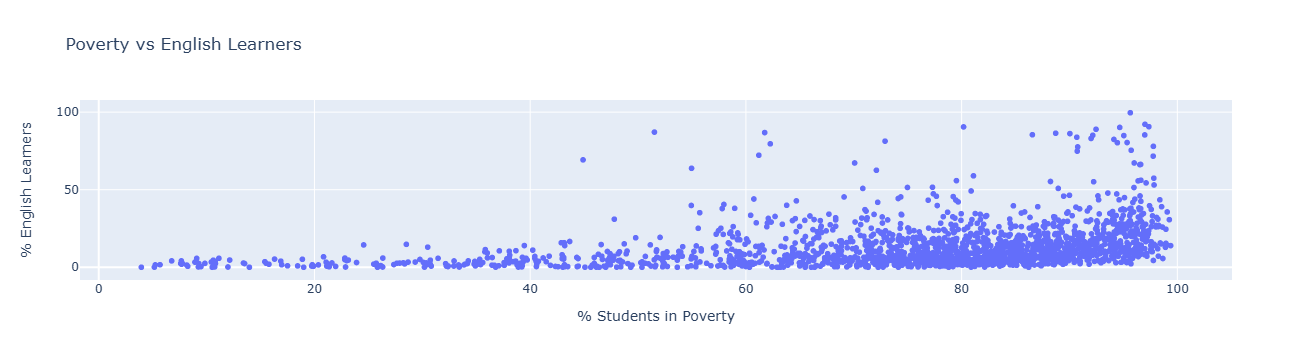

In [14]:
# Create a scatter plot of percent_english_learners vs percent_poverty
px.scatter(schools_df, x="percent_poverty", y="percent_english_learners",
           title="Poverty vs English Learners",
           labels={"percent_poverty": "% Students in Poverty", "percent_english_learners": "% English Learners"})

**2.** Is there any visible relationship between the two variables? Do schools with higher poverty rates tend to have more students learning English as a second language?

A slight upward trend may suggest that higher poverty schools tend to have more English learners, but it's not very strong visually.



**3.** Looking at the scatter plot, what do you think the relationship between poverty and English learners could mean for resource allocation in schools? What implications might this have for educators and policymakers in addressing the needs of these students?

Schools with high poverty and high ESL needs may require more multilingual staff, cultural support programs, and extra academic intervention resources. Policy should prioritize equitable resource allocation based on these overlaps.



# LevelUp

Congratulations on completing the Milestone! In the last visualization, you created scatter plots to visually inspect whether a relationship might exist between variables.

There is a way to **quantify** the relationship between *any* two variables! It is called **correlation**. Correlation ranges from -1 to 1.

When the correlation between two variables is equal to 1, this means that there is a perfect relationship between them. Two variables that would be (almost!) perfectly correlated are `age` and `birth_year`. If you know someone's year of birth, you can predict their age. If you know their age, you can predict their birth year.

When the correlation between two variables is equal to 0, this means that there is no relationship between two variables. For example, `shoe_size` and `favorite_color`. These two variables are not related in any meaningful way.

A negative correlation means that an increase in one variable leads to a decrease in the other. For example, `sea_level` and `temperature`. As you climb a mountain, increasing your hight above sea level, it gets colder. The temperature decreases.

Pandas offers a quick way to examine the correlation between variables at a single glance: the `.corr()` method applied to a DataFrame. The `.corr()` method will produce a table of correlation coefficients: each row/column intersection is the correlation between the variable named in the row and the variable named in the column.

## Task 3: Correlated Variables

#### Apply the .corr() method to your DataFrame containing the NYC Department of Education data.

Examine the table and determine **which two variables have the strongest correlation, and how strong that correlation is.**

Here's a rough guide to understanding correlation coefficients:
- Correlation between 0 and 0.2 is considered to be non-existent to weak.
- Correlation between 0.2 and 0.4 is considered weak.
- Correlation between 0.4 and 0.6 is considered moderate.
- Correlation between 0.6 and 0.8 is considered to be strong.
- Correlation between 0.8 and 1 is considered to be very strong.

<div style="border: 3px solid #b67ae5; background-color: #f9f1ff; padding: 15px; border-radius: 8px; color: #222; display: flex; align-items: center;">
<span style="font-size: 10pt;">
<strong>Note: </strong>A variable will always be perfectly correlated with itself! So disregard the diagonal of your output when answering this question!
</span>
</div>

In [16]:
# Apply the .corr() method to the dataframe
correlation_matrix = schools_df.corr()
print(correlation_matrix)

                                    total_enrollment  \
total_enrollment                            1.000000   
percent_students_with_disabilities         -0.176817   
percent_english_learners                    0.027771   
percent_poverty                            -0.143091   

                                    percent_students_with_disabilities  \
total_enrollment                                             -0.176817   
percent_students_with_disabilities                            1.000000   
percent_english_learners                                      0.020820   
percent_poverty                                               0.079578   

                                    percent_english_learners  percent_poverty  
total_enrollment                                    0.027771        -0.143091  
percent_students_with_disabilities                  0.020820         0.079578  
percent_english_learners                            1.000000         0.315477  
percent_poverty             

Strongest correlation has to be between percent_poverty and percent_english_learners. There correlation coefficient is around 0.55 which is a moderate correlation. This suggests that as poverty increases, so does the number of ESL students, reinforcing the visual trends.

